<a href="https://colab.research.google.com/github/edeodato/competicao_FLAI_ML/blob/main/competicao_FLAI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INICIANDO IMPORTAÇÕES

In [102]:
#!pip install sweetviz

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import plotly.express as px


## Modelagem
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

## Validacao
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold


In [104]:
df_treino = pd.read_csv('./treino.csv')
df_teste = pd.read_csv('./teste.csv')

## EDA

In [105]:
df_treino.head()

nome       sexo  ... maxatraso  cliente
0  EDUARDO P.  masculino  ...        10        1
1    ANDRE Q.  masculino  ...         7        0
2     LUIZ N.   feminino  ...         0        1
3  RODRIGO M.  masculino  ...         0        0
4  GERALDO V.  masculino  ...         6        0

[5 rows x 15 columns]

Análises preliminares.

In [106]:
df_treino.shape

(7391, 15)

In [107]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7391 entries, 0 to 7390
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nome         7391 non-null   object 
 1   sexo         7391 non-null   object 
 2   id           7391 non-null   object 
 3   origem       4841 non-null   float64
 4   idade        6836 non-null   float64
 5   salario      7391 non-null   float64
 6   credito      6960 non-null   float64
 7   tempo        7391 non-null   int64  
 8   regiao       7391 non-null   object 
 9   estadocivil  7391 non-null   object 
 10  educacao     6092 non-null   object 
 11  nprodutos    7391 non-null   int64  
 12  pagamento    7391 non-null   object 
 13  maxatraso    7391 non-null   int64  
 14  cliente      7391 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 866.3+ KB


Conferindo alguns valores únicos em determinadas colunas.

In [108]:
df_treino['nome'].nunique()

2424

In [109]:
df_treino['id'].nunique()

7391

In [110]:
df_treino['origem'].nunique()

4841

Verificando correlações.

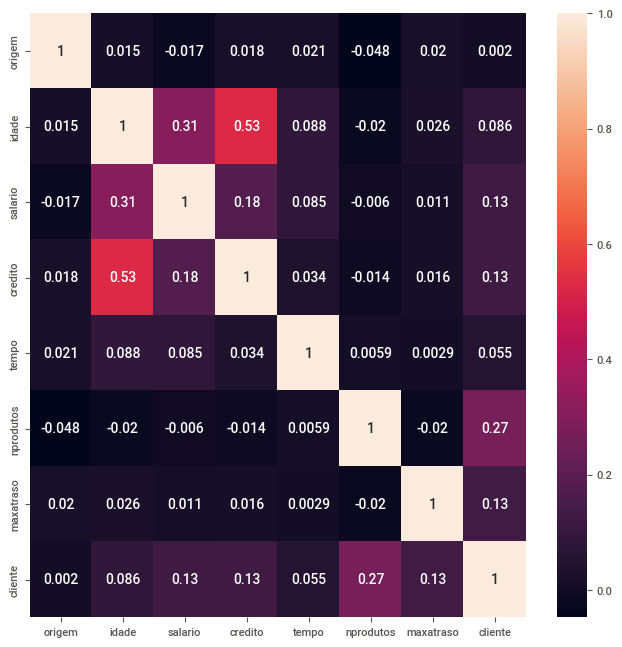

In [111]:
plt.figure(figsize = (8,8))
corr = df_treino.corr()
sns.heatmap(corr, annot= True);

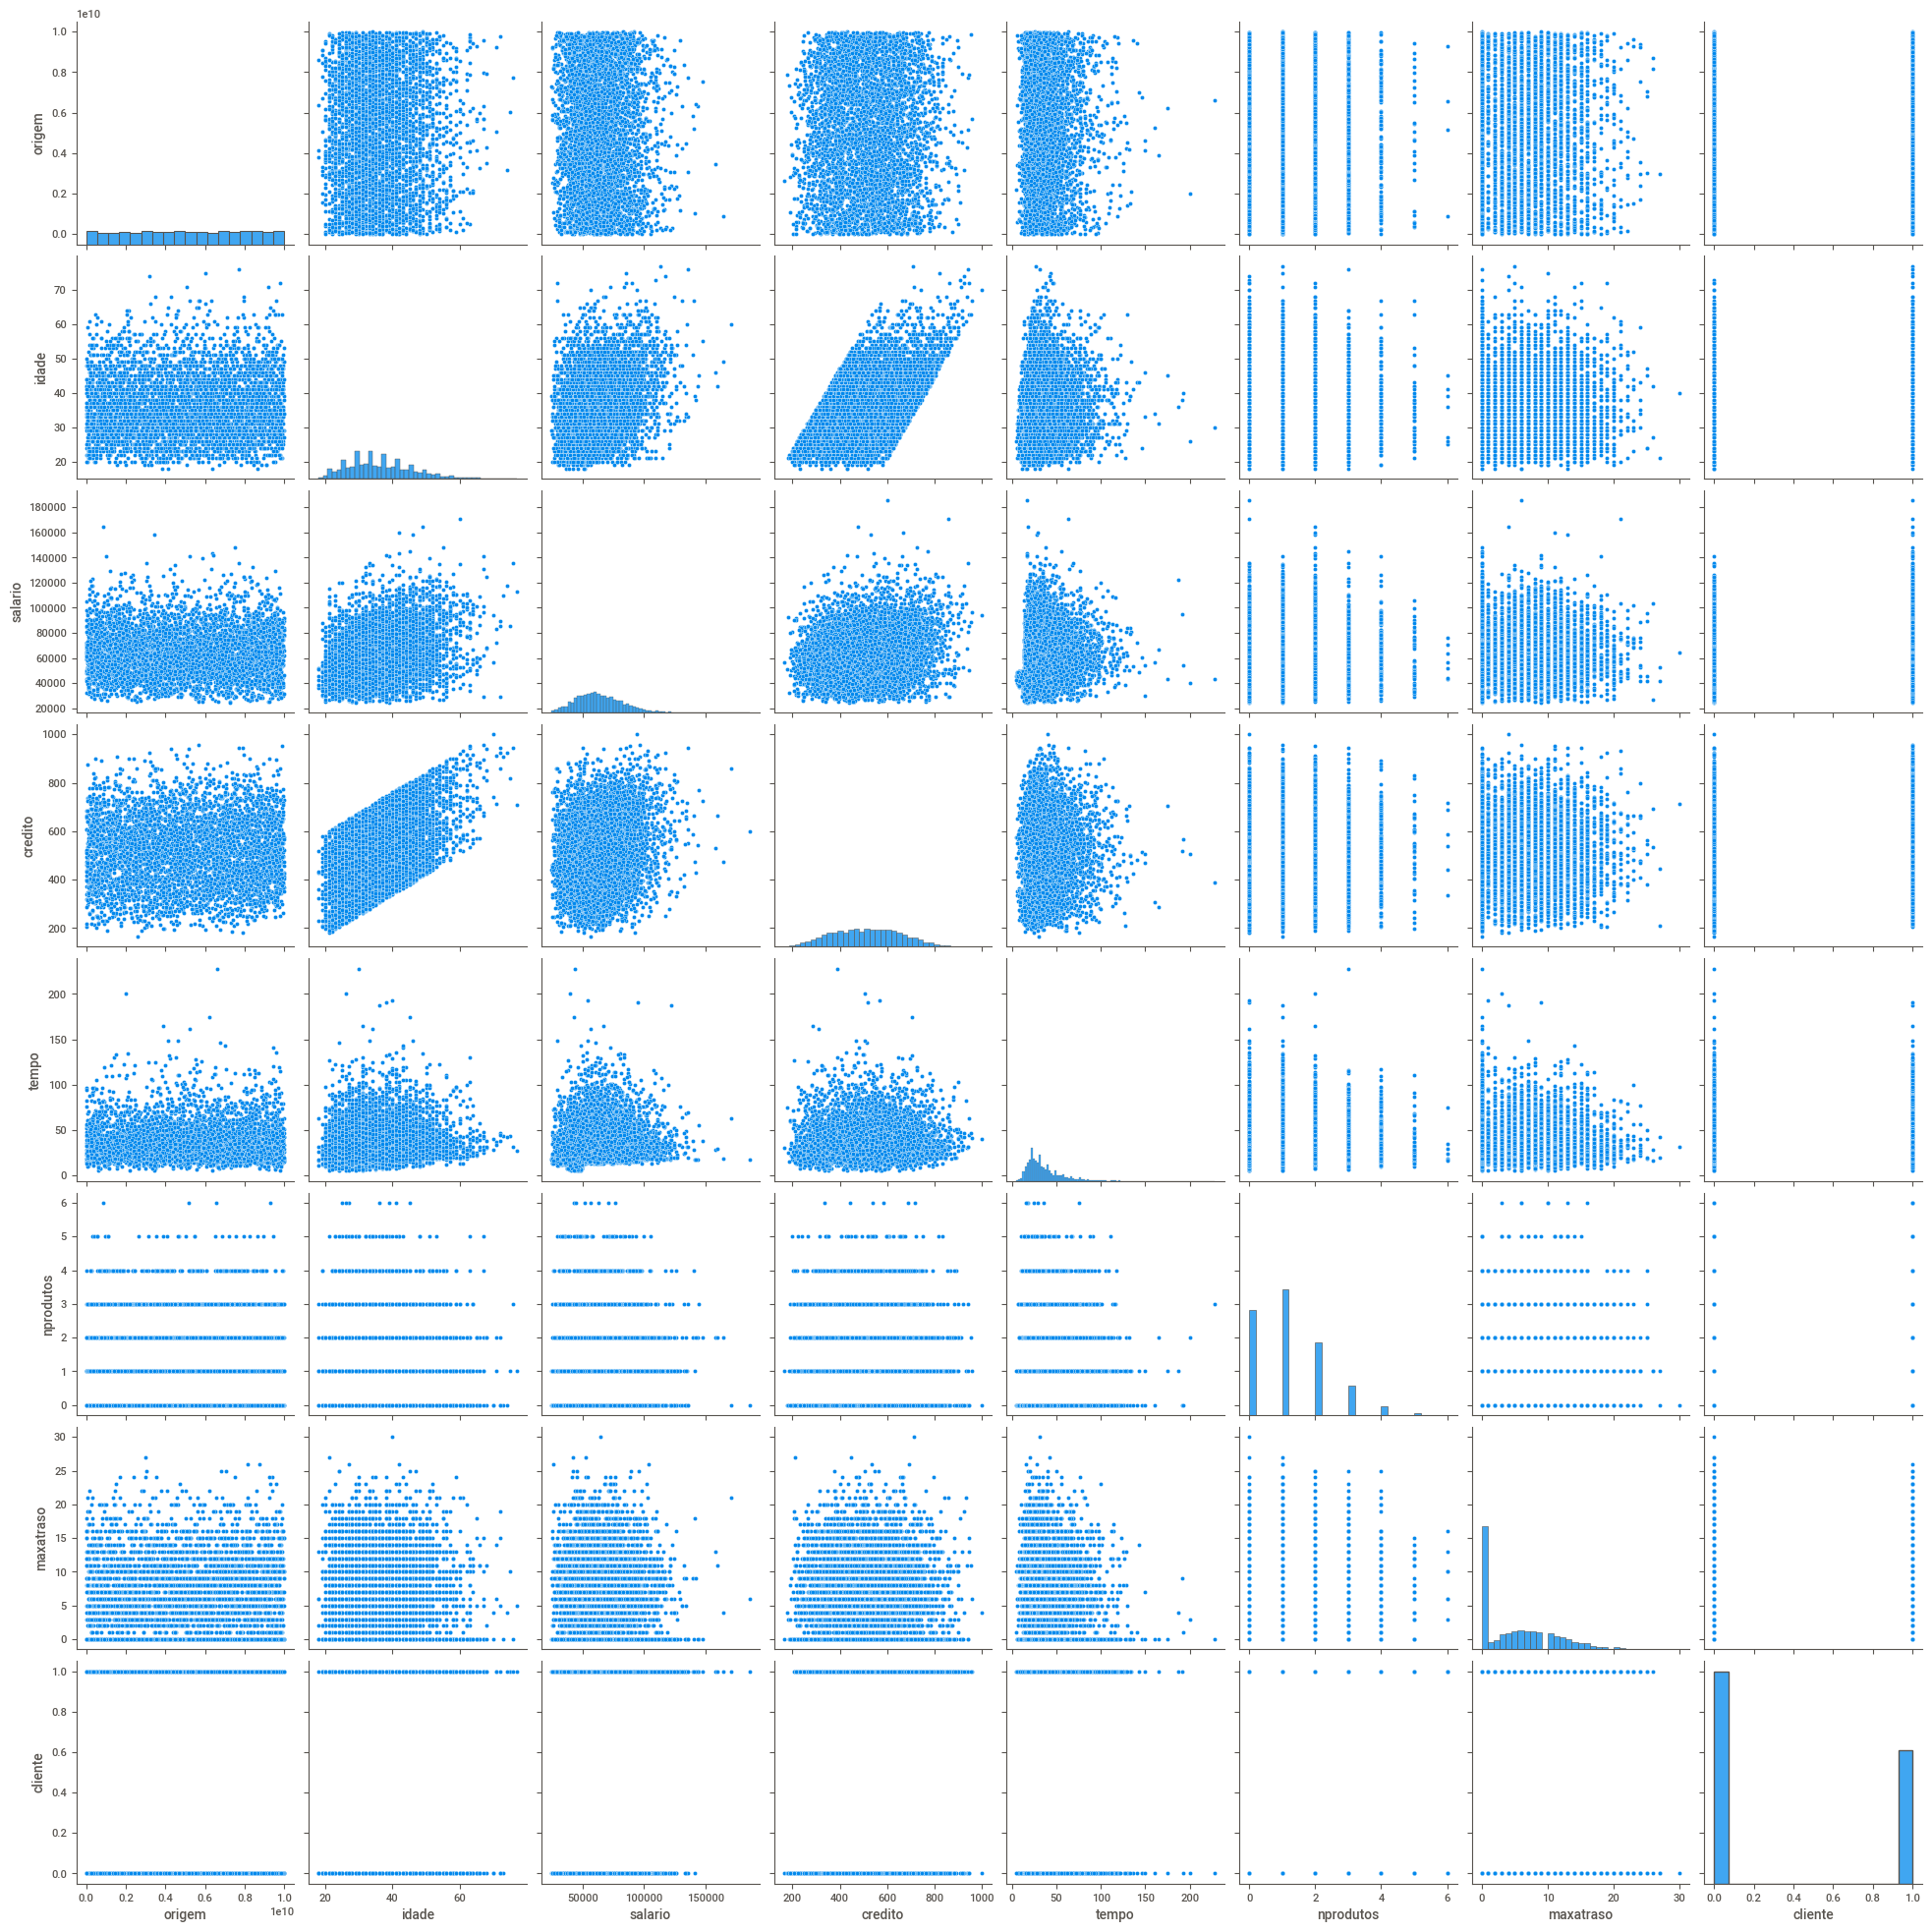

In [112]:
sns.pairplot(df_treino)

Experimentando visualizações.

In [113]:
fig = px.histogram(df_treino, x= 'salario', marginal= 'rug',
                   hover_data= df_treino.columns)
fig.show()

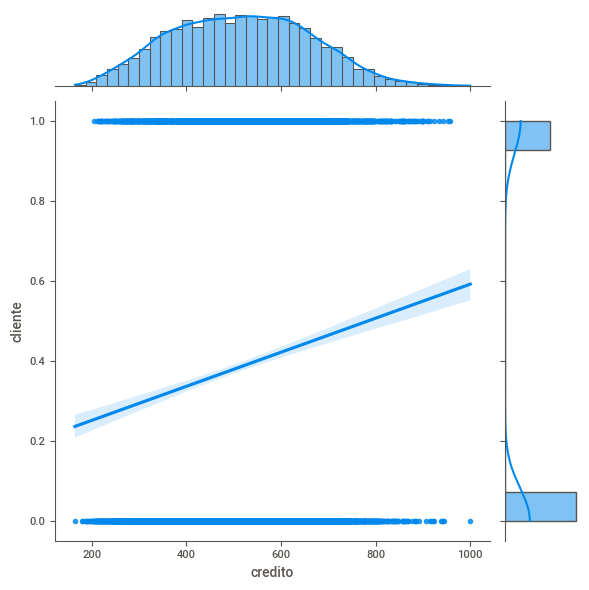

In [114]:
sns.jointplot(y= df_treino['cliente'], x= df_treino['credito'], kind= 'reg');

Continuando a checar variações em relação a variável alvo.

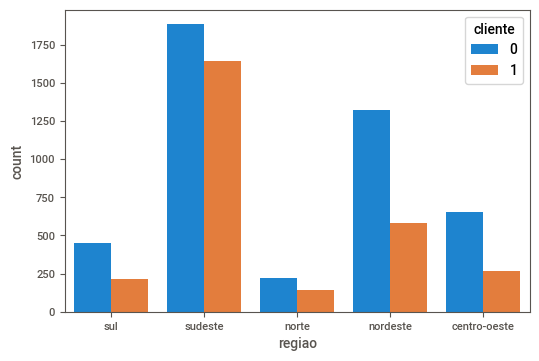

In [115]:
sns.countplot(x = df_treino['regiao'],
             hue = df_treino['cliente']);

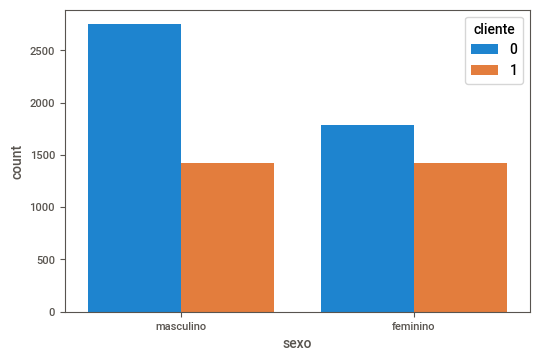

In [116]:
sns.countplot(x = df_treino['sexo'],
             hue = df_treino['cliente']);

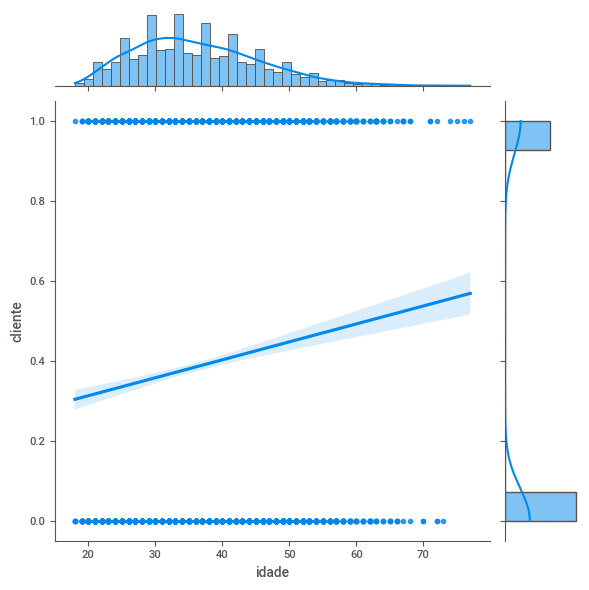

In [117]:
sns.jointplot(y= df_treino['cliente'], x= df_treino['idade'], kind= 'reg');

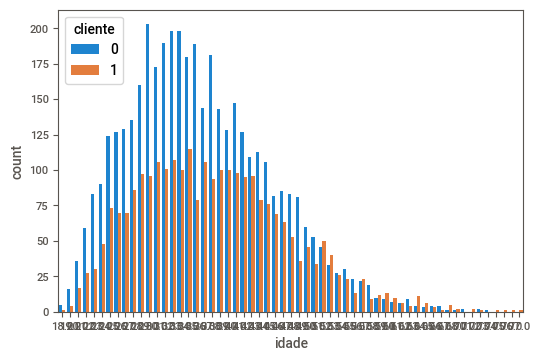

In [118]:
sns.countplot(x = df_treino['idade'],
             hue = df_treino['cliente']);

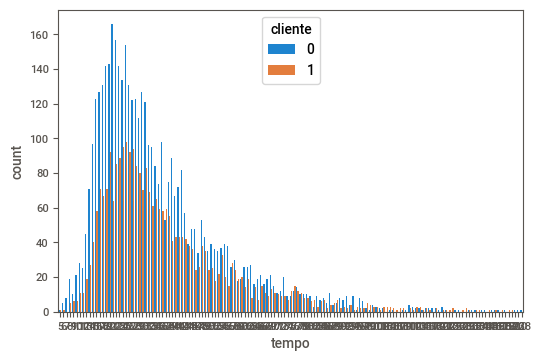

In [119]:
sns.countplot(x = df_treino['tempo'],
             hue = df_treino['cliente']);

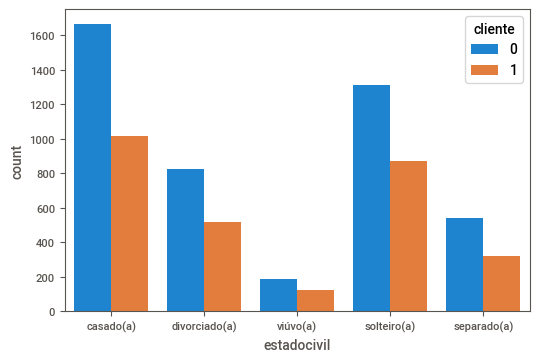

In [120]:
sns.countplot(x = df_treino['estadocivil'],
             hue = df_treino['cliente']);

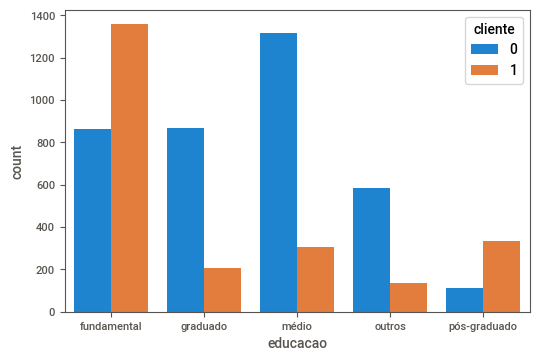

In [121]:
sns.countplot(x = df_treino['educacao'],
             hue = df_treino['cliente']);

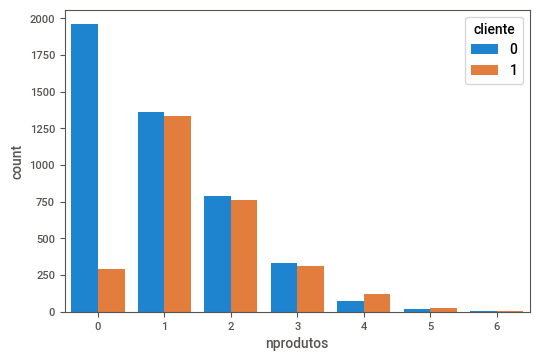

In [122]:
sns.countplot(x = df_treino['nprodutos'],
             hue = df_treino['cliente']);

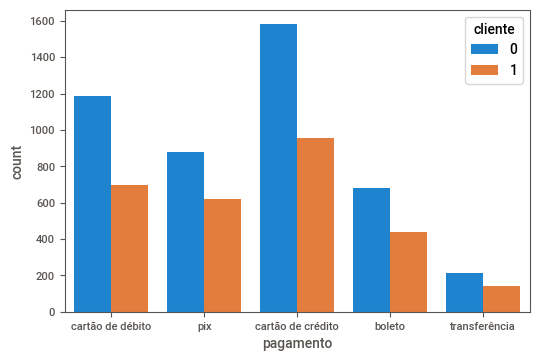

In [123]:
sns.countplot(x = df_treino['pagamento'],
             hue = df_treino['cliente']);

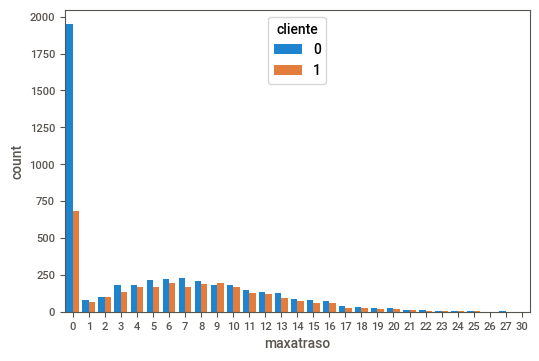

In [124]:
sns.countplot(x = df_treino['maxatraso'],
             hue = df_treino['cliente']);

Checando quais variáveis possuem valores nulos e suas quantificações.

In [125]:
df_treino.isnull().sum()[df_treino.isnull().sum() != 0]

origem      2550
idade        555
credito      431
educacao    1299
dtype: int64

Continuando a análise exploratória.

In [126]:
df_treino.describe()

origem        idade  ...    maxatraso      cliente
count  4.841000e+03  6836.000000  ...  7391.000000  7391.000000
mean   5.039730e+09    36.231422  ...     5.477879     0.386145
std    2.893878e+09     9.272387  ...     5.516762     0.486898
min    2.839180e+05    18.000000  ...     0.000000     0.000000
25%    2.599718e+09    29.000000  ...     0.000000     0.000000
50%    5.053879e+09    35.000000  ...     5.000000     0.000000
75%    7.534099e+09    42.000000  ...     9.000000     1.000000
max    9.997148e+09    77.000000  ...    30.000000     1.000000

[8 rows x 8 columns]

Distribuição das variáveis.

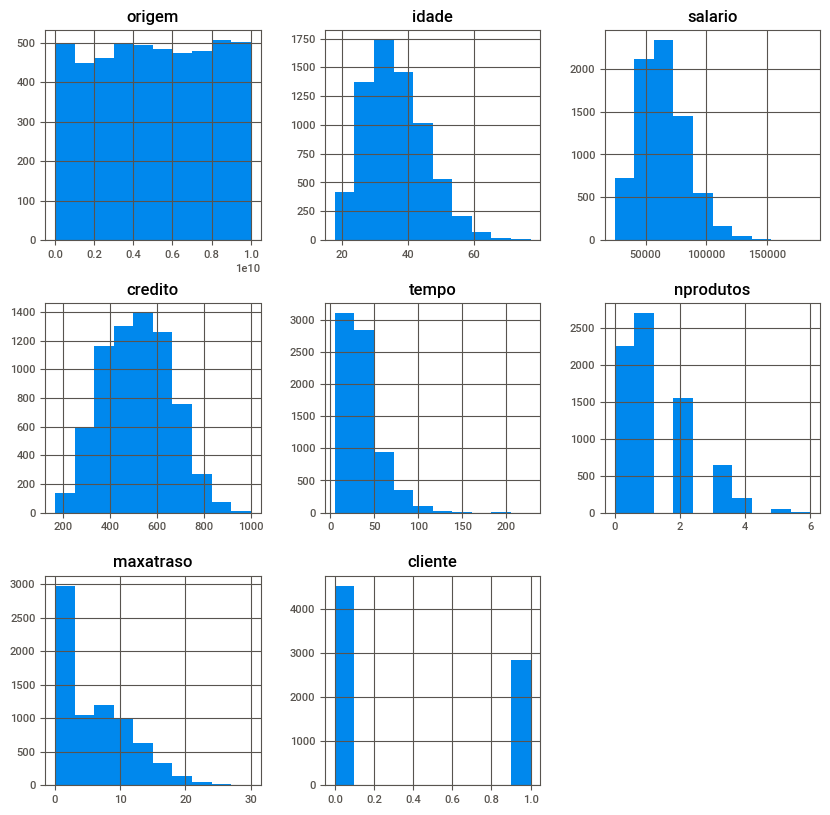

In [127]:
hist_treino = df_treino.hist(figsize=(10,10))

In [128]:
eda = sv.analyze(source = df_treino, 
                 target_feat = 'cliente')

                                             |          | [  0%]   00:00 -> (? left)


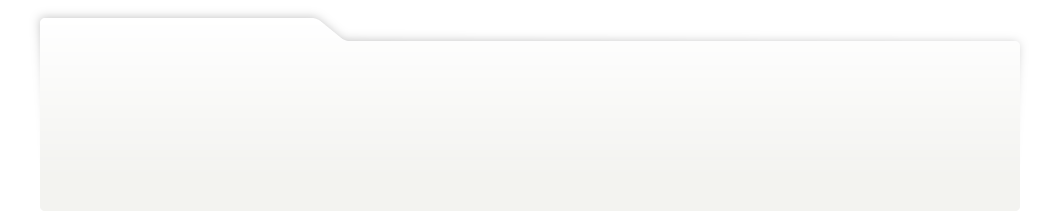
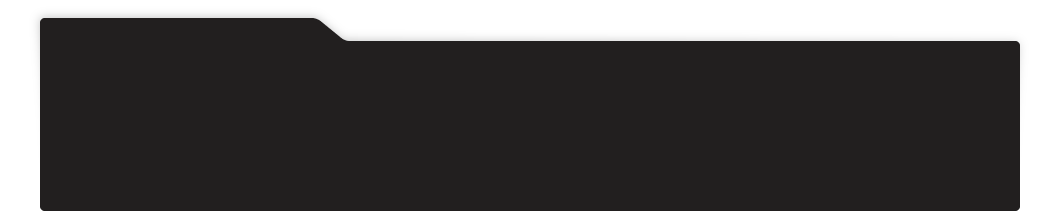
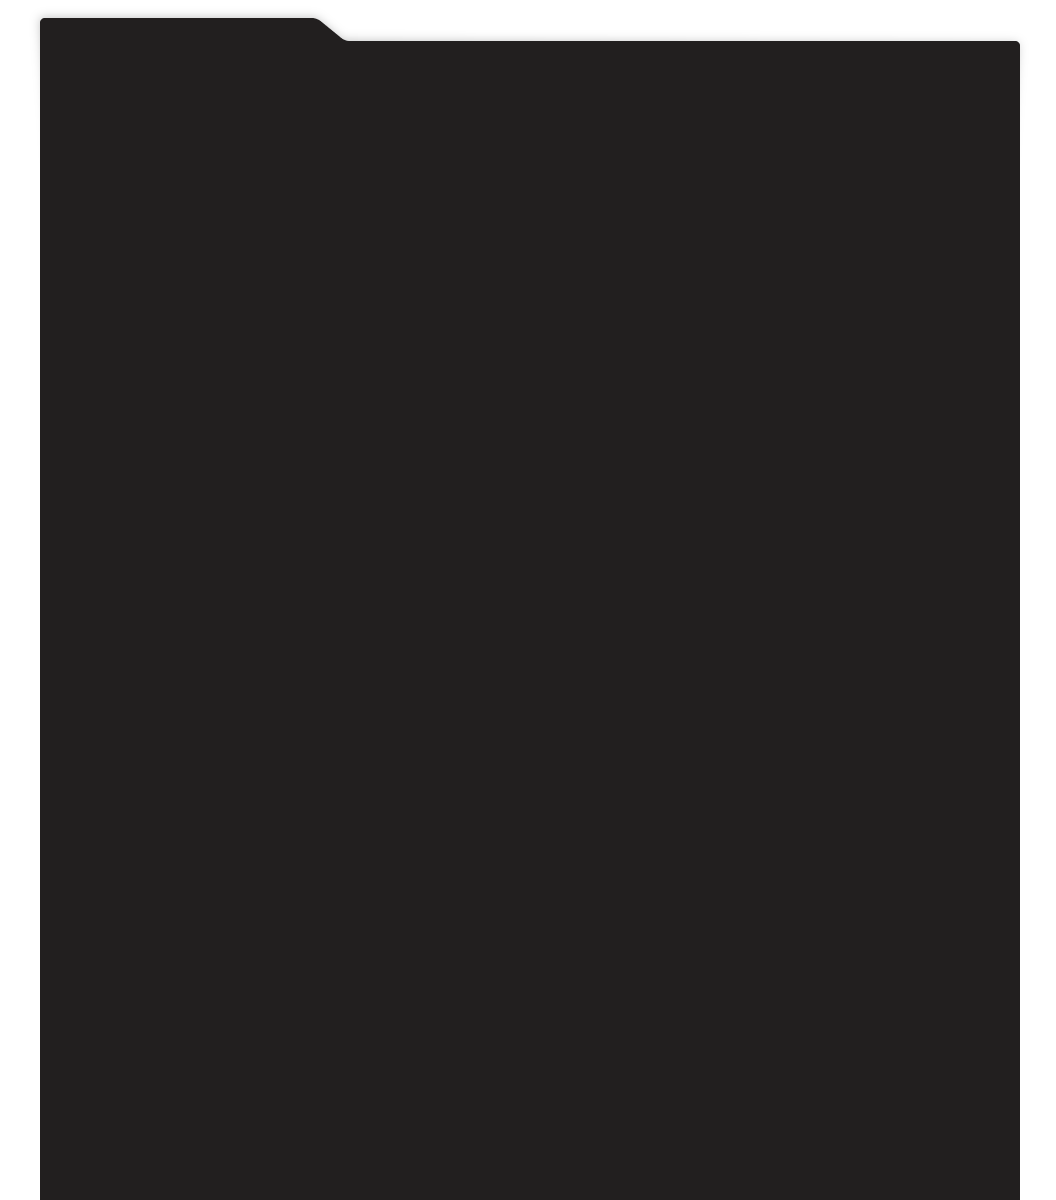
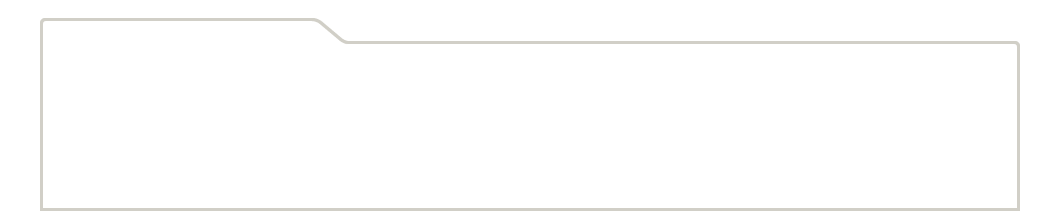
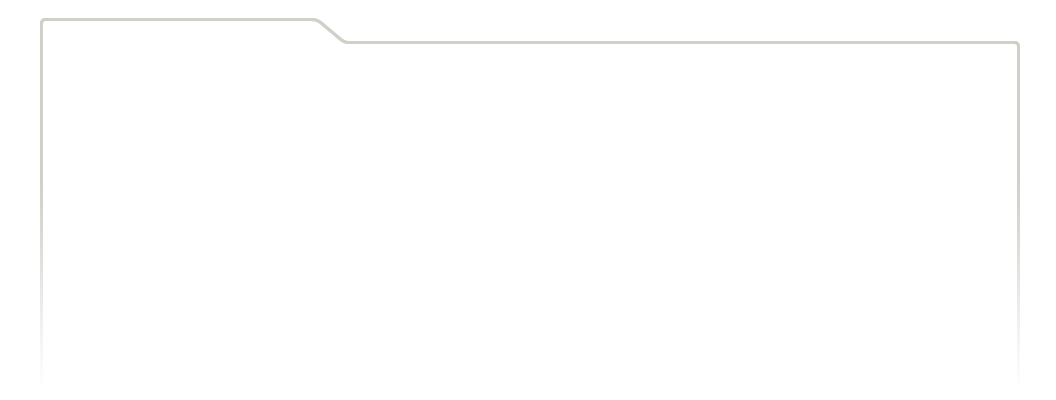
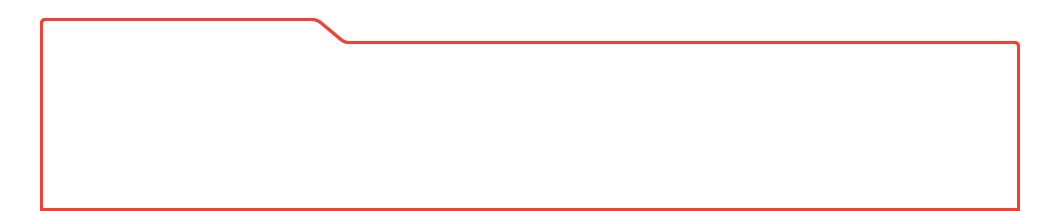
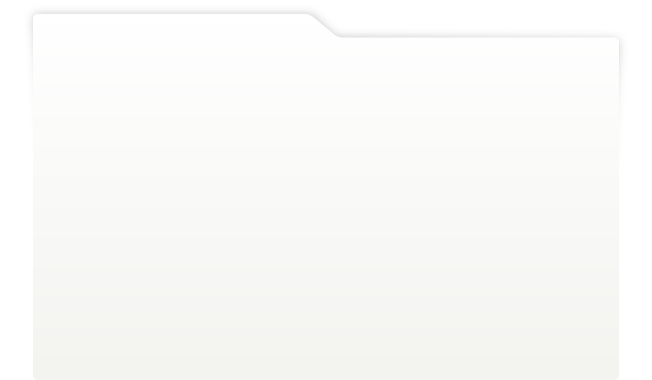
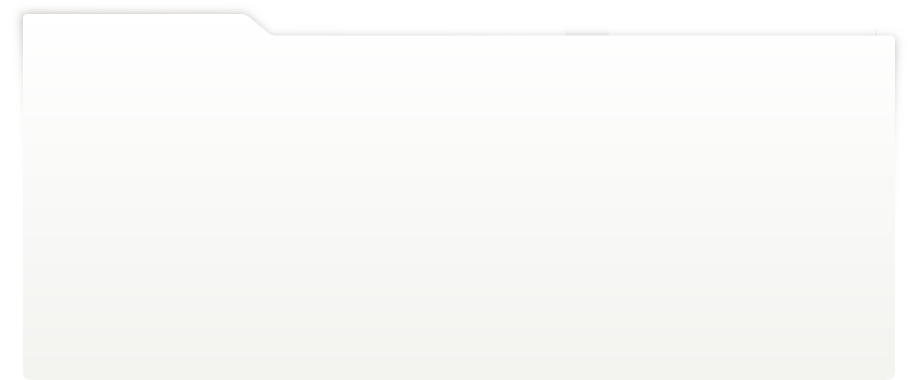
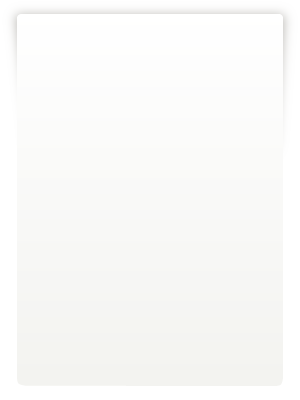
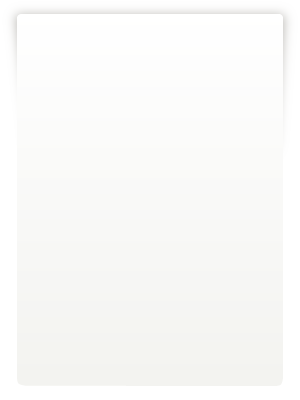
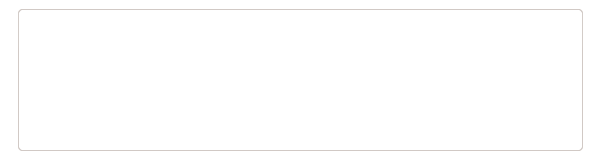
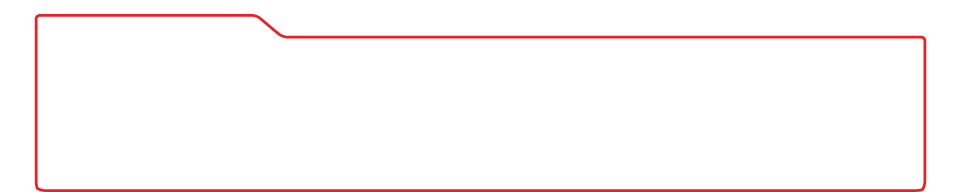
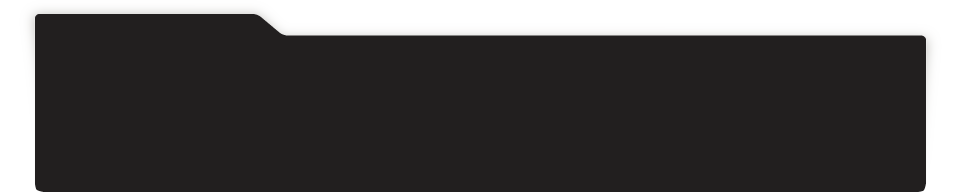
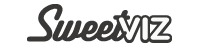
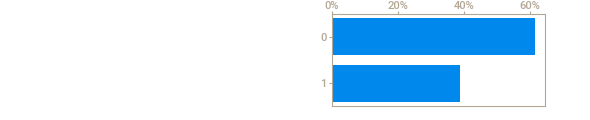
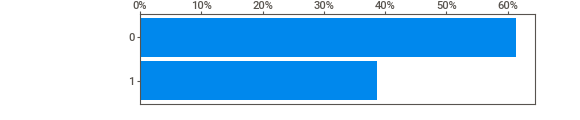
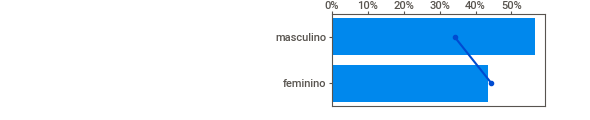
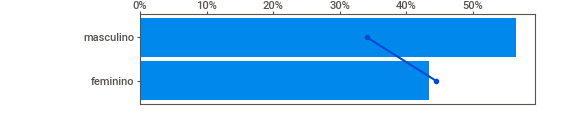
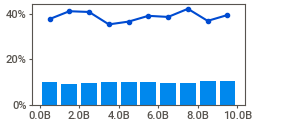
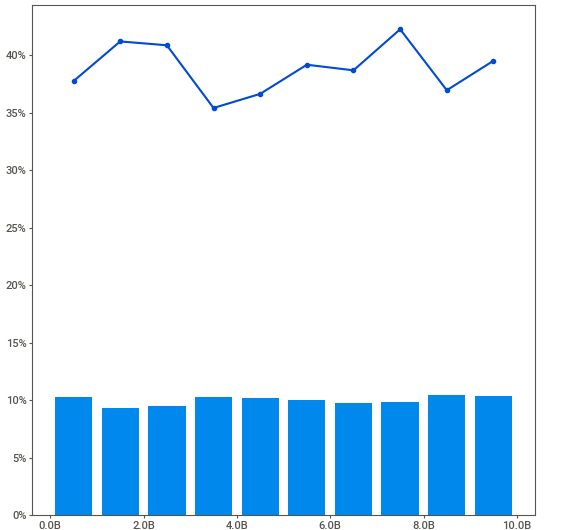
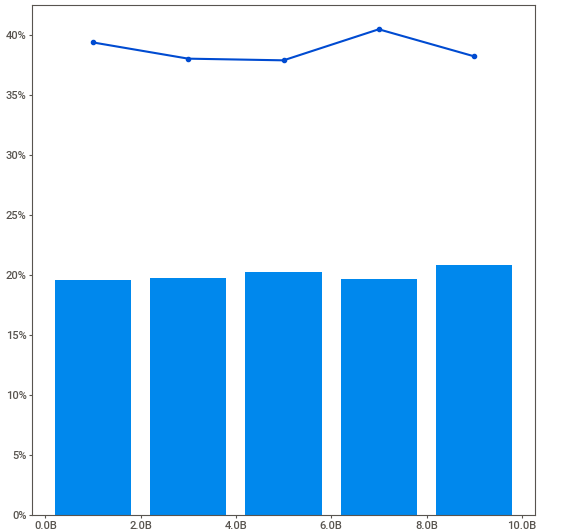
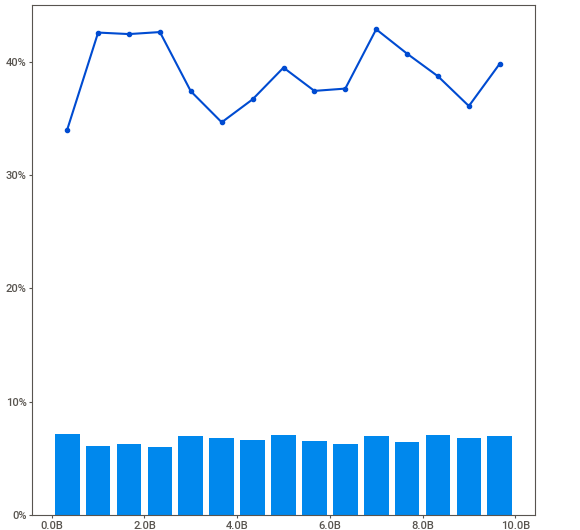
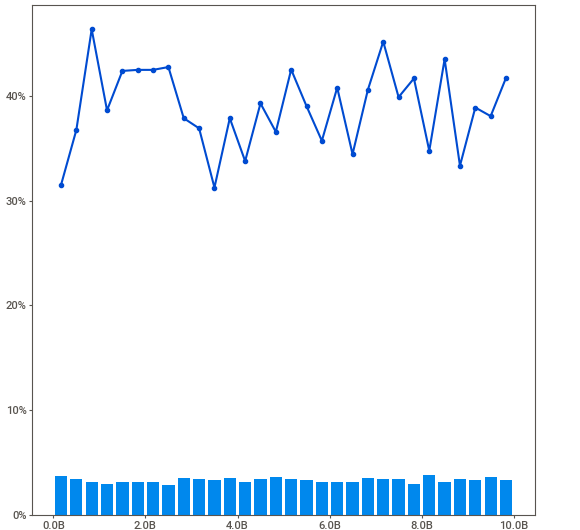
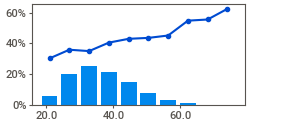
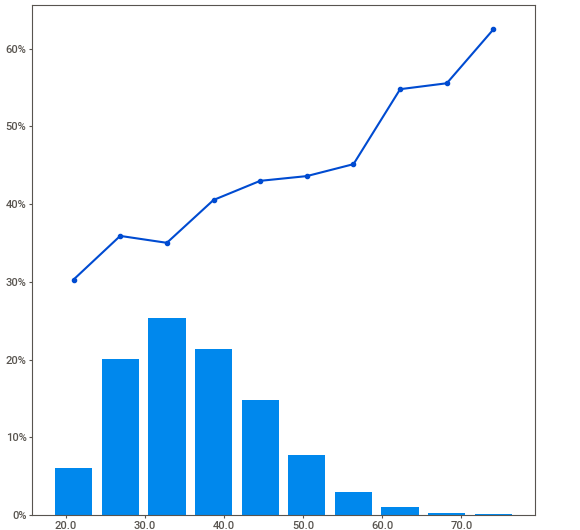
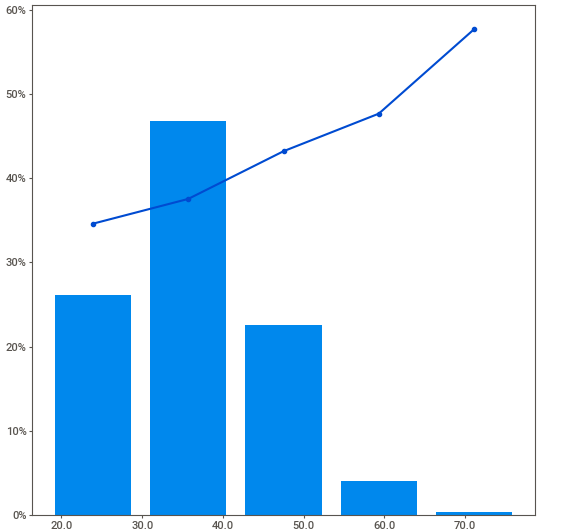
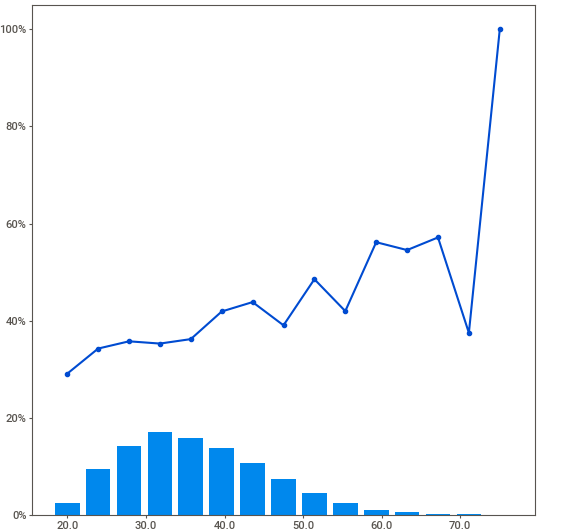
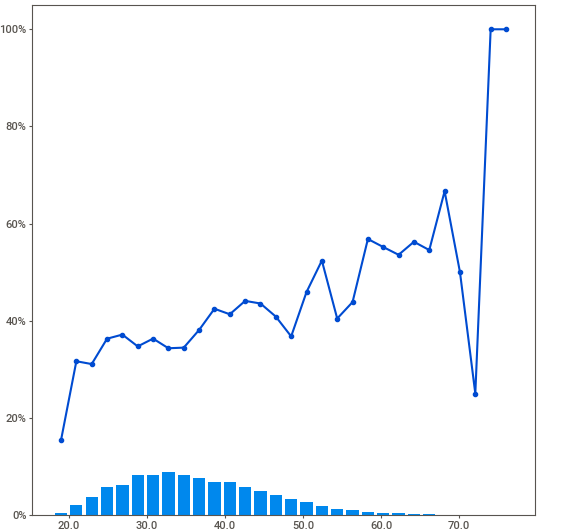
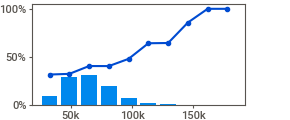
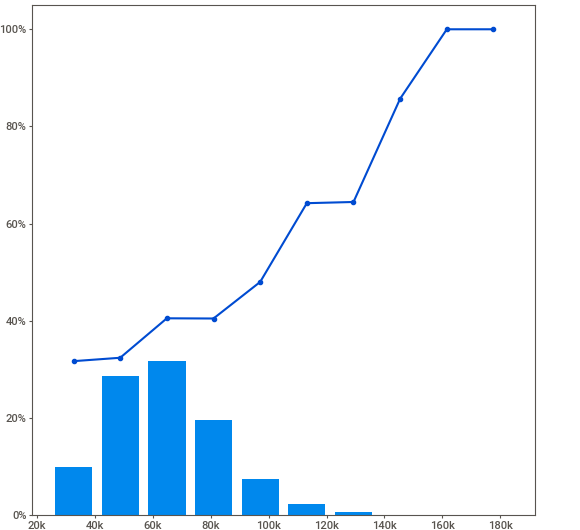
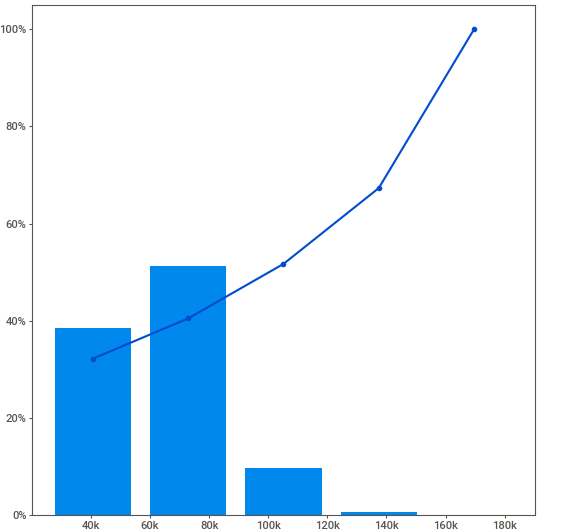
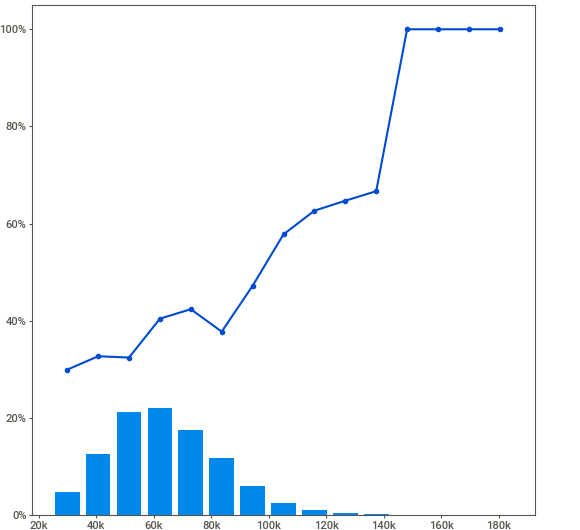
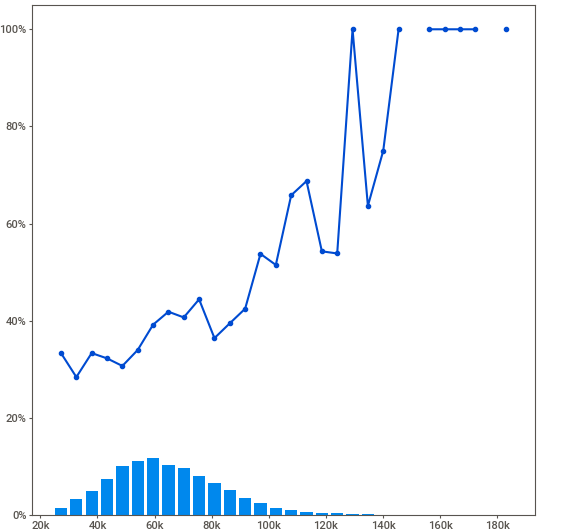
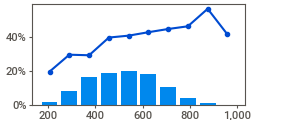
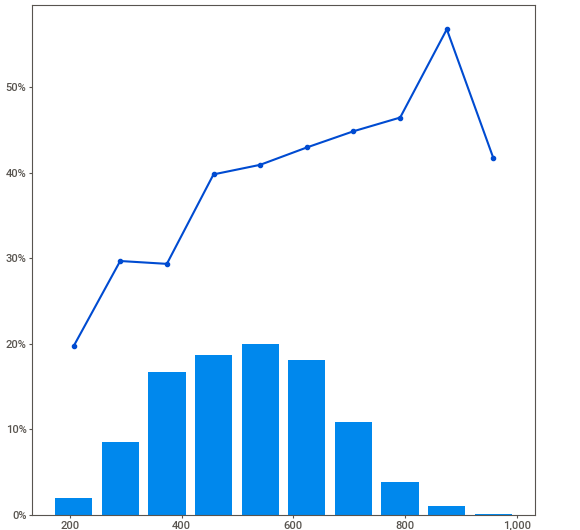
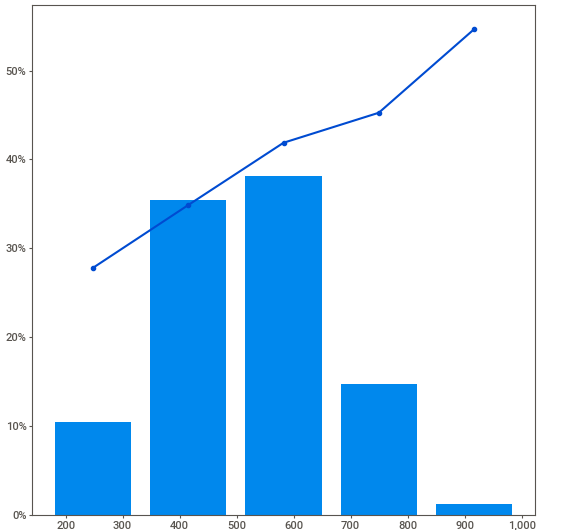
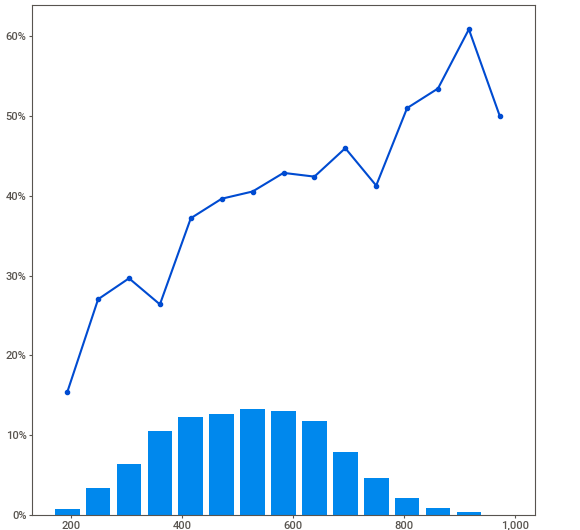
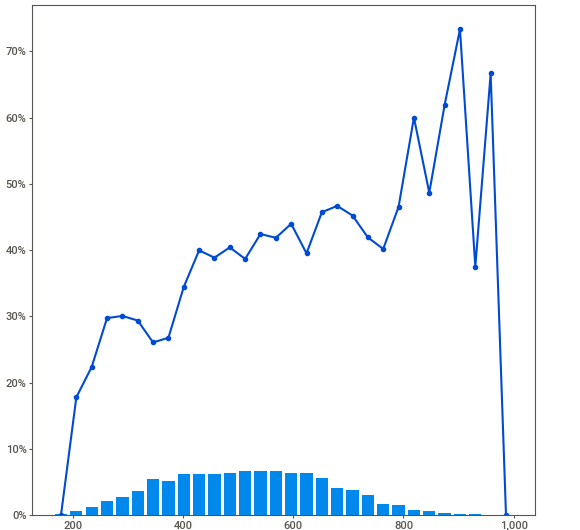
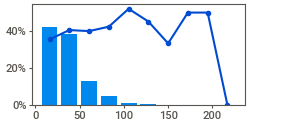
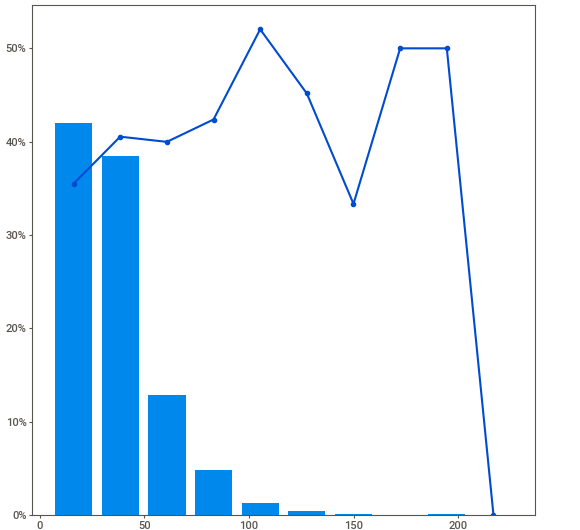
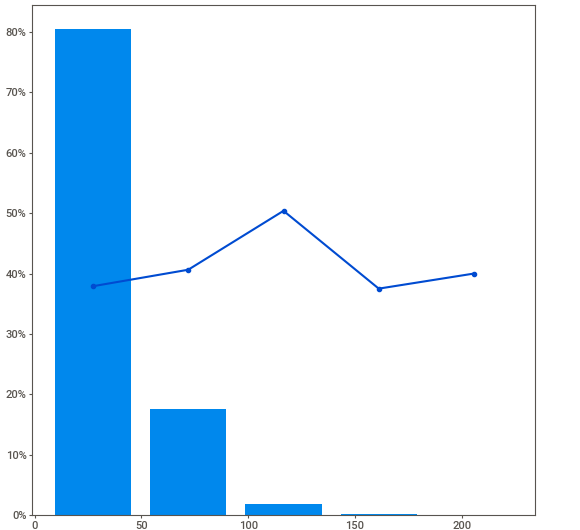
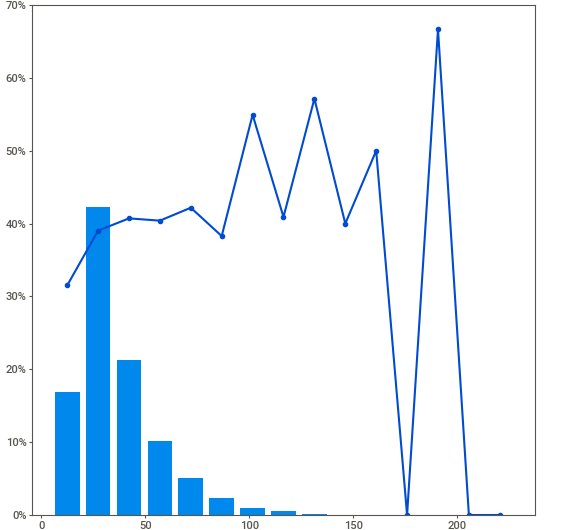
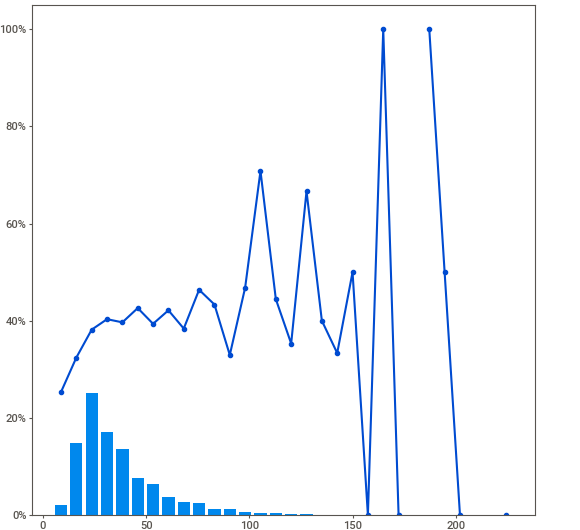
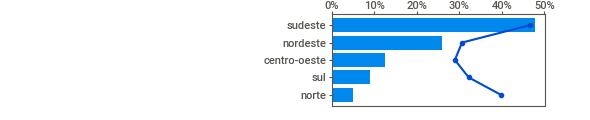
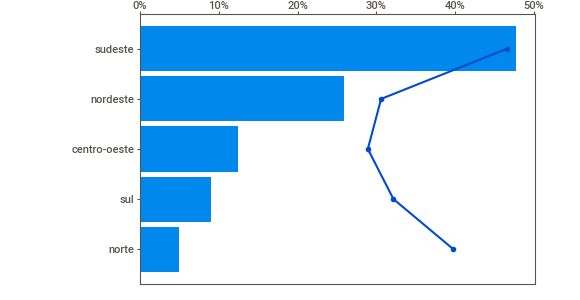
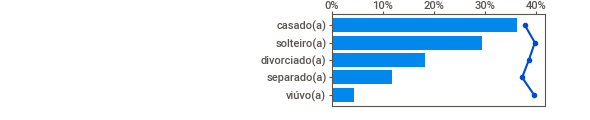
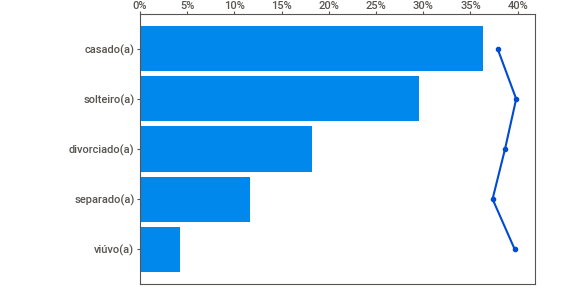
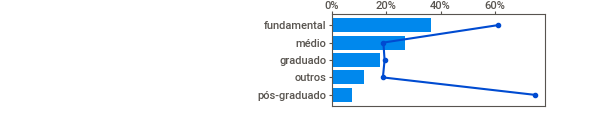
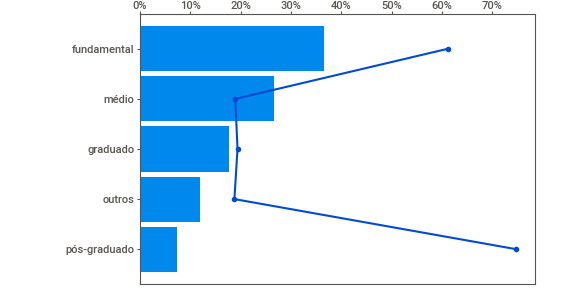
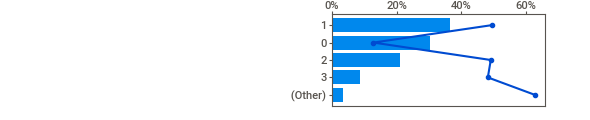
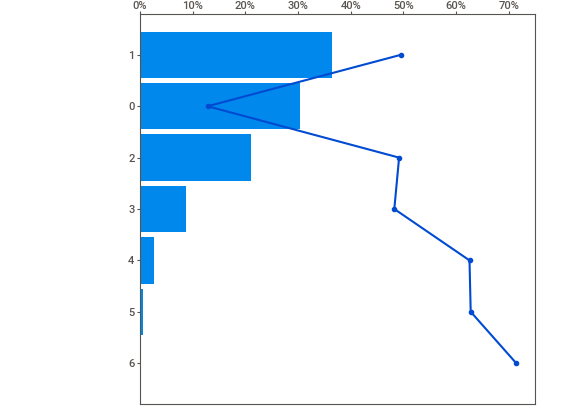
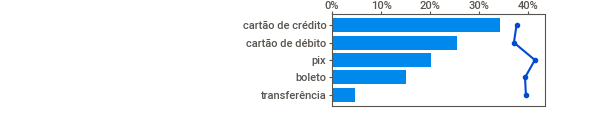
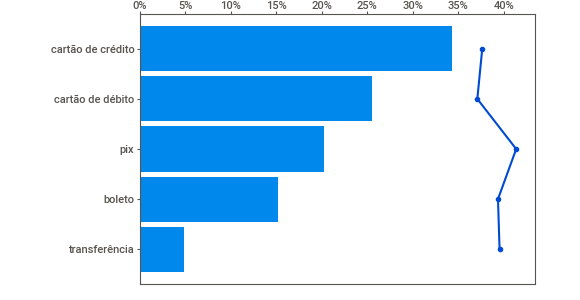
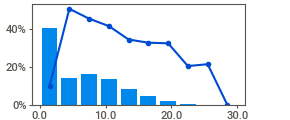
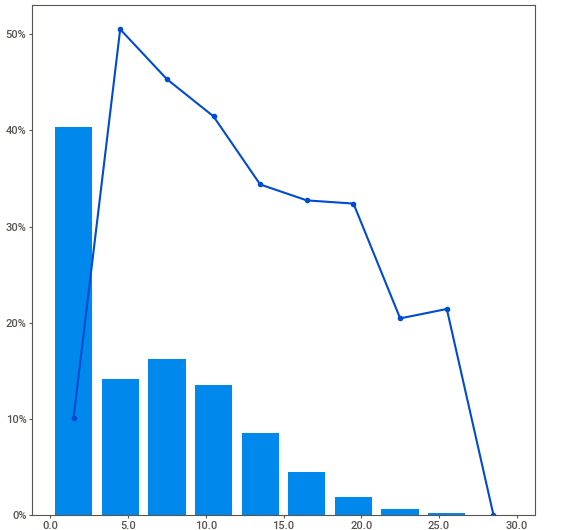
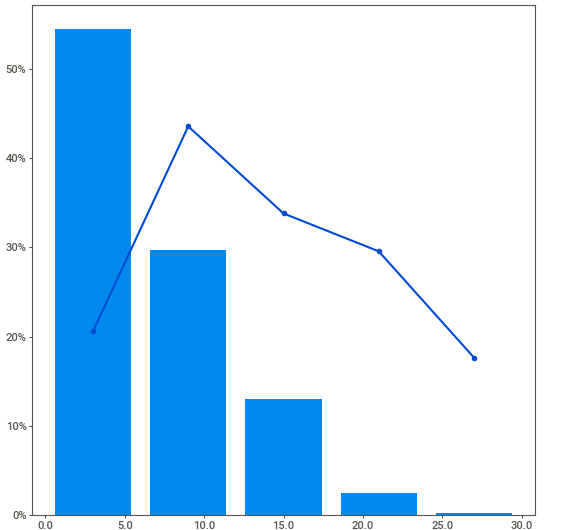
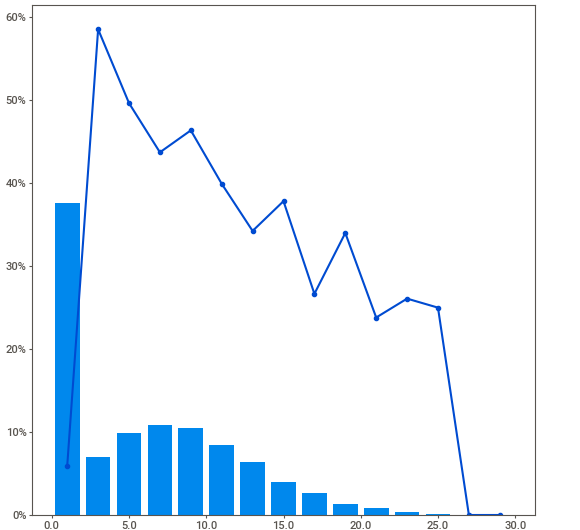
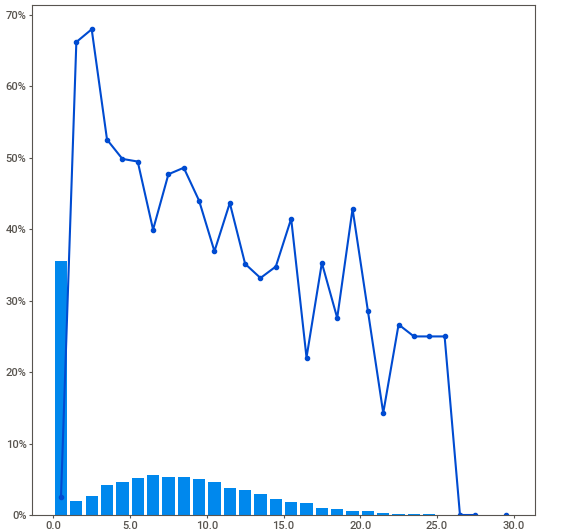
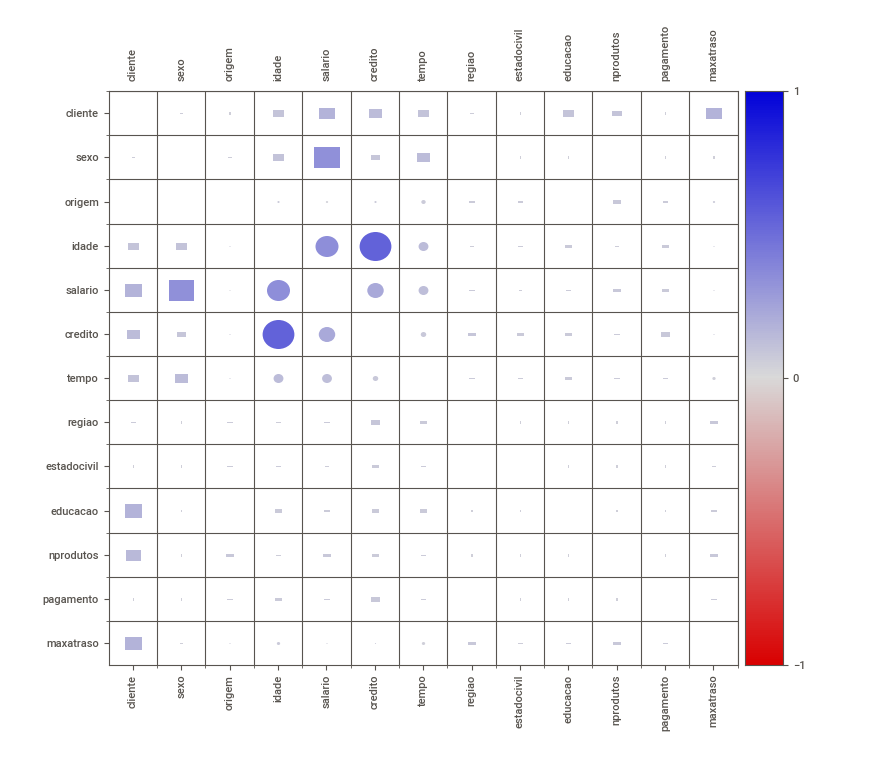
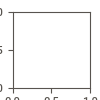

In [129]:
eda.show_notebook()

Vamos começar analisandos as colunas que contêm valores nulos.

Analisando 'idade'.

In [130]:
df_treino['idade'].unique()

array([41., 27., 40., 29., 30., 35., 32., 39., 49., 50., nan, 36., 33.,
       46., 31., 44., 24., 58., 37., 47., 45., 38., 34., 42., 25., 21.,
       26., 23., 43., 52., 28., 48., 59., 22., 56., 61., 53., 55., 51.,
       20., 67., 60., 54., 57., 75., 18., 65., 63., 62., 19., 71., 77.,
       68., 64., 72., 66., 73., 70., 76., 74.])

In [131]:
df_treino['idade'].nunique()

59

In [132]:
df_treino['idade'].mean()

36.231421884142776

In [133]:
df_treino['idade'].median()

35.0

Analisando 'credito'.

In [134]:
round(df_treino['credito'].mean(), 1)

516.4

In [135]:
round(df_treino['credito'].median(), 1)

516.2

Analisando 'educacao'.

In [136]:
df_treino['educacao'].unique()

array(['fundamental', 'graduado', 'médio', 'outros', nan, 'pós-graduado'],
      dtype=object)

In [137]:
df_treino['educacao'].nunique()

5

Veremos agora as variáveis contínuas.

Variável 'tempo'.

In [138]:
df_treino['tempo'].nunique()

141

In [139]:
df_treino['tempo'].value_counts().sort_values(ascending= True)

165      1
191      1
120      1
128      1
175      1
      ... 
21     230
23     231
20     235
22     242
25     252
Name: tempo, Length: 141, dtype: int64

In [140]:
df_treino['tempo'].describe()

count    7391.000000
mean       36.172642
std        20.543764
min         5.000000
25%        22.000000
50%        30.000000
75%        44.000000
max       228.000000
Name: tempo, dtype: float64

Variável 'maxatraso'.

In [141]:
df_treino['maxatraso'].unique()

array([10,  7,  0,  6,  5, 13,  4,  1,  9, 15,  3,  8, 12, 17, 16, 27, 11,
        2, 21, 14, 18, 24, 20, 23, 25, 22, 19, 26, 30])

In [142]:
df_treino['maxatraso'].nunique()

29

In [143]:
df_treino['maxatraso'].value_counts().sort_values(ascending= False)

0     2633
6      413
8      397
7      392
5      388
9      375
10     344
4      343
3      314
11     277
12     256
13     217
2      200
14     161
1      148
15     135
16     127
17      68
18      58
20      42
19      42
21      21
22      15
23       8
24       8
25       4
27       2
26       2
30       1
Name: maxatraso, dtype: int64

In [144]:
df_treino['maxatraso'].describe()

count    7391.000000
mean        5.477879
std         5.516762
min         0.000000
25%         0.000000
50%         5.000000
75%         9.000000
max        30.000000
Name: maxatraso, dtype: float64

Por fim vamos analisar a coluna 'nprodutos'.

In [145]:
df_treino['nprodutos'].unique()

array([1, 0, 2, 3, 4, 6, 5])

Vamos checar a existência de possíveis outliers e fazer o tratamento se necessário.

In [146]:
df_treino[['credito', 'salario']].describe()

credito        salario
count  6960.000000    7391.000000
mean    516.351135   64172.354485
std     143.962820   19319.876392
min     164.500000   24535.000000
25%     405.675000   50193.500000
50%     516.250000   62050.000000
75%     621.400000   76154.000000
max    1000.000000  185747.000000

Pelo observado a coluna 'credito' não tem outliers, porém a coluna 'salario' aparenta ter. Vamos conferir.

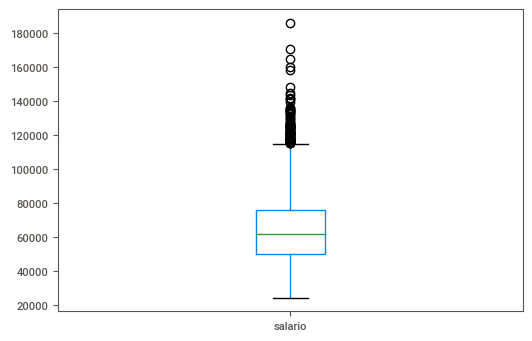

In [147]:
df_treino['salario'].plot(kind = 'box');

## PRÉ-PROCESSAMENTO DOS DADOS

Vamos iniciar o pré-processamento dropando as colunas que não fazem sentido para o processo num primeiro momento, que são: nome, id, origem

In [148]:
## REMOVENDO COLUNAS NAO INTERESSANTES
df_treino.drop(['nome', 'id', 'origem'], axis= 1, inplace= True)

Vamos preencher os valores nulos encontrados na base.

In [149]:
## PREENCHENDO NULOS

## PARA A IDADE VAMOS UTILIZAR A MEDIANA
df_treino['idade'].fillna(df_treino['idade'].median(), inplace= True)

## PARA O CREDITO VAMOS UTILIZAR A MEDIA
df_treino['credito'].fillna(df_treino['credito'].mean(), inplace= True)

## PARA A EDUCACAO VAMOS CRIAR UMA NOVA CATEGORIA
## AFIM DE NÃO TENDENCIAR UMA DAS JÁ EXISTENTES
df_treino['educacao'].fillna('vazio', inplace= True)

Remoção de outliers.

In [150]:
## REMOVENDO OUTLIERS DA VARIAVEL SALARIO
topo = df_treino['salario'].quantile(0.975)
df_treino.loc[df_treino['salario'] > topo, 'salario'] = topo

Normalização de variáveis numéricas para adequar à modelagem.

In [151]:
## NORMALIZANDO AS COLUNAS NECESSARIAS
media_idade = np.mean(df_treino['idade'])
desvio_idade = np.std(df_treino['idade'])
df_treino['idade'] = (df_treino['idade'] - media_idade)/desvio_idade

df_treino['tempo'] = df_treino['tempo']/max(df_treino['tempo'])

df_treino['maxatraso'] = df_treino['maxatraso']/max(df_treino['maxatraso'])

df_treino['salario'] = df_treino['salario']/100000

df_treino['credito'] = df_treino['credito']/1000

df_treino['nprodutos'] = df_treino['nprodutos']/max(df_treino['nprodutos'])



Dumificaçao de variáveis categóricas.

In [152]:
var_cat = ['sexo', 'regiao', 'estadocivil', 'educacao', 'pagamento']
df_treino = pd.get_dummies(df_treino, columns = var_cat)

Vamos verificar como ficou nossa base!

In [153]:
df_treino.head()

idade  salario  ...  pagamento_pix  pagamento_transferência
0  0.544795  0.44249  ...              0                        0
1 -1.024235  0.60347  ...              1                        0
2  0.432721  0.75920  ...              0                        0
3 -0.800088  0.68066  ...              0                        0
4 -0.688015  0.76392  ...              0                        0

[5 rows x 30 columns]

Realizar o mesmo tratamento para a base de teste.

Mesmo existindo métodos otimizados para esse fim, decidi manter dessa forma para efeito de estudo.

In [154]:


## REMOVENDO COLUNAS NAO INTERESSANTES
df_teste.drop(['nome', 'id', 'origem'], axis= 1, inplace= True)

## PREENCHENDO NULOS
df_teste['idade'].fillna(df_teste['idade'].median(), inplace= True)
df_teste['educacao'].fillna('vazio', inplace= True)
df_teste['credito'].fillna(df_teste['credito'].mean(), inplace= True)

## REMOVENDO OUTLIERS
topo = df_teste['salario'].quantile(0.975)
df_teste.loc[df_teste['salario'] > topo, 'salario'] = topo

## NORMALIZANDO
media_idade = np.mean(df_teste['idade'])
desvio_idade = np.std(df_teste['idade'])
df_teste['idade'] = (df_teste['idade'] - media_idade)/desvio_idade

df_teste['tempo'] = df_teste['tempo']/max(df_teste['tempo'])

df_teste['maxatraso'] = df_teste['maxatraso']/max(df_teste['maxatraso'])

df_teste['salario'] = df_teste['salario']/100000

df_teste['credito'] = df_teste['credito']/1000

df_teste['nprodutos'] = df_teste['nprodutos']/max(df_teste['nprodutos'])

## DUMIFICANDO
var_cat = ['sexo', 'regiao', 'estadocivil', 'educacao', 'pagamento']
df_teste = pd.get_dummies(df_teste, columns = var_cat)

## INSERINDO COLUNA AUSENTE NA BASE DE TESTE COM VALOR '0'.
zeros = np.zeros(shape=(2609,1))
zeros = zeros.astype(np.uint8)
df_teste.insert(7, 'sexo_masculino', zeros)

df_teste.head()

idade  salario  ...  pagamento_pix  pagamento_transferência
0 -0.942622  0.39513  ...              0                        0
1  0.306734  0.63342  ...              0                        0
2 -0.374733  0.66513  ...              1                        0
3 -0.829044  0.60958  ...              0                        0
4 -0.715466  0.50975  ...              1                        0

[5 rows x 29 columns]

In [155]:
df_treino.describe()

idade      salario  ...  pagamento_pix  pagamento_transferência
count  7.391000e+03  7391.000000  ...    7391.000000              7391.000000
mean  -4.162698e-16     0.638905  ...       0.202408                 0.047896
std    1.000068e+00     0.184885  ...       0.401822                 0.213561
min   -2.032898e+00     0.245350  ...       0.000000                 0.000000
25%   -6.880146e-01     0.501935  ...       0.000000                 0.000000
50%   -1.276465e-01     0.620500  ...       0.000000                 0.000000
75%    6.568687e-01     0.761540  ...       0.000000                 0.000000
max    4.579445e+00     1.077198  ...       1.000000                 1.000000

[8 rows x 30 columns]

# MODELAGEM DE DADOS

Inicialmente definir algumas variáveis para a etapa de modelagem de dados.

Vamos dividir a base em 2 variáveis, X e y, base de input e variável target respectivamente.

In [55]:
X = df_treino.drop('cliente', axis = 1)
y = df_treino['cliente']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy',
                    'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência',
                    'f1-score']

No código abaixo estamos criando uma lista de modelos incluindo algumas variações de cada um deles.

In [56]:
lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        DecisionTreeClassifier(max_depth = 9),
                        DecisionTreeClassifier(max_depth = 11),
                        DecisionTreeClassifier(max_depth = 13),
                        DecisionTreeClassifier(max_depth = 15),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        KNeighborsClassifier(n_neighbors = 35),
                        KNeighborsClassifier(n_neighbors = 45),
                        KNeighborsClassifier(n_neighbors = 55),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=50, max_depth = 9),
                        RandomForestClassifier(n_estimators=50, max_depth = 11),
                        RandomForestClassifier(n_estimators=50, max_depth = 13),
                        RandomForestClassifier(n_estimators=50, max_depth = 15),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 9),
                        RandomForestClassifier(n_estimators=100, max_depth = 11),
                        RandomForestClassifier(n_estimators=100, max_depth = 13),
                        RandomForestClassifier(n_estimators=100, max_depth = 15)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        'Árvore (prof = 9)',
                        'Árvore (prof = 11)',
                        'Árvore (prof = 13)',
                        'Árvore (prof = 15)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        '35-NN',
                        '45-NN',
                        '55-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 50, prof = 9)',
                        'Random Forest (arvs = 50, prof = 11)',
                        'Random Forest (arvs = 50, prof = 13)',
                        'Random Forest (arvs = 50, prof = 15)',
                        'Random Forest (arvs = 100, prof = 5)',
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 100, prof = 9)',
                        'Random Forest (arvs = 100, prof = 11)',
                        'Random Forest (arvs = 100, prof = 13)',
                        'Random Forest (arvs = 100, prof = 15)']

Vamos executar os mesmos e verificar seus resultados.

Nessa primeira parte estamos o método de cross-validation Stratified do KFold.

In [57]:
resultados0 = {}

validacao_skf = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao_skf,
                             scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: Árvore (prof = 9)
Rodando modelo: Árvore (prof = 11)
Rodando modelo: Árvore (prof = 13)
Rodando modelo: Árvore (prof = 15)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: 35-NN
Rodando modelo: 45-NN
Rodando modelo: 55-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 50, prof = 9)
Rodando modelo: Random Forest (arvs = 50, prof = 11)
Rodando modelo: Random Forest (arvs = 50, prof = 13)
Rodando modelo: Random Forest (arvs = 50, prof = 15)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 9)
Rodando modelo: Random Forest (arvs = 100, prof = 11)
Rodando modelo: Random Forest (arvs = 10

In [58]:
resultados.sort_values(by = 'f1-score', ascending = False)

acurácia  ...  f1-score
Random Forest (arvs = 100, prof = 15)  0.834935  ...  0.811827
Random Forest (arvs = 50, prof = 15)   0.834257  ...  0.811007
Random Forest (arvs = 100, prof = 13)  0.834528  ...  0.810773
Random Forest (arvs = 50, prof = 13)   0.833176  ...  0.809480
Random Forest (arvs = 100, prof = 11)  0.834258  ...  0.808992
Random Forest (arvs = 50, prof = 11)   0.833039  ...  0.808395
Random Forest (arvs = 100, prof = 9)   0.830199  ...  0.802249
Random Forest (arvs = 50, prof = 9)    0.829252  ...  0.801472
Bagging                                0.820324  ...  0.797835
Random Forest (arvs = 100, prof = 7)   0.823705  ...  0.791757
Random Forest (arvs = 50, prof = 7)    0.822217  ...  0.790807
Árvore (prof = 9)                      0.809634  ...  0.787428
Árvore (prof = 7)                      0.805304  ...  0.777409
Árvore (prof = 11)                     0.792722  ...  0.773339
Árvore (prof = 5)                      0.788527  ...  0.764457
Random Forest (arvs = 50, prof = 5)    0.802330  ...  0.762592
Árvore (prof = 13)                     0.777973  ...  0.760928
Random Forest (arvs = 100, prof = 5)   0.799757  ...  0.760301
Regressão Logística                    0.780544  ...  0.758623
Árvore (prof = 15)                     0.767423  ...  0.753191
Árvore (prof = 3)                      0.772427  ...  0.728609
35-NN                                  0.726427  ...  0.696343
25-NN                                  0.723719  ...  0.695824
45-NN                                  0.722639  ...  0.690915
15-NN                                  0.716821  ...  0.690727
55-NN                                  0.719661  ...  0.685821
5-NN                                   0.702072  ...  0.679679

[27 rows x 5 columns]

Vamos testar o método de cross-validation Repeated do KFold com apenas alguns modelos.

In [59]:
validacao_rkf = RepeatedKFold(n_splits = 10, n_repeats = 100)

In [60]:
modelo_LR = LogisticRegression() 
medidas_LR = cross_validate(modelo_LR, X, y, cv = validacao_rkf, scoring = 'f1')
medidas_LR['test_score'].mean()

0.7011973920978611

In [61]:
modelo_BC = BaggingClassifier()
medidas_BC = cross_validate(modelo_BC, X, y, cv = validacao_rkf, scoring = 'f1')
medidas_BC['test_score'].mean()

0.7465649500888012

In [62]:
modelo_RF100_13 = RandomForestClassifier(n_estimators=100, max_depth = 13)
medidas_RF100_13 = cross_validate(modelo_RF100_13, X, y, cv = validacao_rkf,
                                  scoring = 'f1')
medidas_RF100_13['test_score'].mean()

0.766170991580163

In [63]:
modelo_RF50_13 = RandomForestClassifier(n_estimators=50, max_depth = 13)
medidas_RF50_13 = cross_validate(modelo_RF50_13, X, y, cv = validacao_rkf,
                                 scoring = 'f1')
medidas_RF50_13['test_score'].mean()

0.765098843402564

In [64]:
modelo_RF100_15 = RandomForestClassifier(n_estimators=100, max_depth = 15)
medidas_RF100_15 = cross_validate(modelo_RF100_15, X, y, cv = validacao_rkf,
                                  scoring = 'f1')
medidas_RF100_15['test_score'].mean()

0.7665077704640649

In [65]:
modelo_RF50_15 = RandomForestClassifier(n_estimators=50, max_depth = 15)
medidas_RF50_15 = cross_validate(modelo_RF50_15, X, y, cv = validacao_rkf,
                                 scoring = 'f1')
medidas_RF50_15['test_score'].mean()

0.7642472683932049

In [67]:
modelo_RF100_15.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

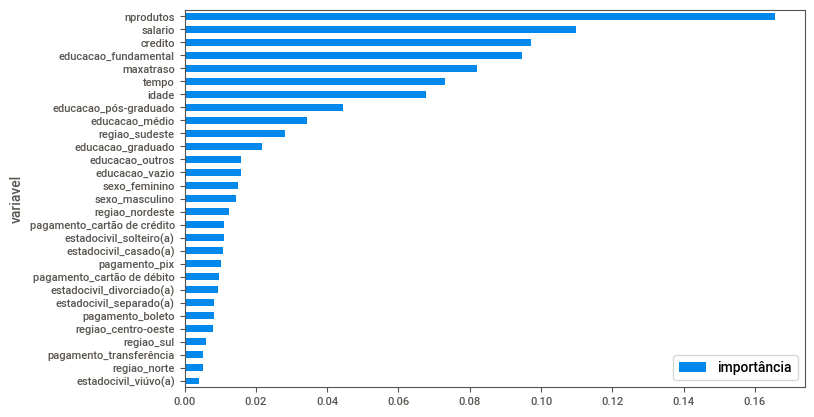

In [68]:
variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importância'] = modelo_RF100_15.feature_importances_
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8, 5));

### Combinação de modelos por voto

Vamos realizar combinação de modelos por votação nos códigos abaixo, por Hard Voting e Soft Voting.

Vamos também "combinar" os métodos de validação utilizados anteriormente, Repeated e Stratified, em um único método.

In [69]:
validacao_rskf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

In [70]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog_H = LogisticRegression()
knn_H = KNeighborsClassifier(n_neighbors = 25)
arvore_H = DecisionTreeClassifier(max_depth = 9) 
floresta_H = RandomForestClassifier(n_estimators = 150, max_depth = 17,
                                    min_samples_split = 10,
                                    min_samples_leaf = 1,
                                    max_features = 'sqrt')

modelos_H = [('Reg. Log.', reglog_H), ('KNN', knn_H), ('Árvore', arvore_H),
             ('Floresta', floresta_H)]

modelo_H = VotingClassifier(modelos_H, voting = 'hard')
medidas_H = cross_validate(modelo_H, X, y, cv = validacao_rskf, scoring = 'f1')
medidas_H['test_score'].max()

0.7626774847870181

In [71]:
medidas_H['test_score'].min()

0.6861924686192469

In [72]:
medidas_H['test_score'].mean()

0.720031060213636

In [74]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog_S = LogisticRegression()
knn_S = KNeighborsClassifier(n_neighbors = 25) 
arvore_S = DecisionTreeClassifier(max_depth = 3)
floresta_S = RandomForestClassifier(n_estimators=100, max_depth = 17,
                                    min_samples_split = 10,
                                    min_samples_leaf = 1)

modelos_S = [('Reg. Log.', reglog_S), ('KNN', knn_S), ('Árvore', arvore_S),
             ('Floresta', floresta_S)]

modelo_S = VotingClassifier(modelos_S, voting = 'soft')

medidas_S = cross_validate(modelo_S, X, y, cv = validacao_rskf, scoring = 'f1')
medidas_S['test_score'].max()

0.7722772277227723

In [75]:
medidas_H['test_score'].min()

0.6861924686192469

In [76]:
medidas_H['test_score'].mean()

0.720031060213636

In [87]:
modelo_H

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                                           

In [88]:
modelo_S

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                                           

# PREDIÇÃO

Vamos realizar a predição dos dados e gerar os arquivos de submissão da competição.

Primeiro vamos gerar o arquivo do modelo de votação "soft".

In [90]:
modelo_S.fit(X,y)

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                                           

In [91]:
pred = modelo_S.predict(df_teste)

In [92]:
subm = pd.DataFrame()
subm['cliente'] = pred

In [93]:
subm.to_csv('edson_luis_deodato_02.csv', index = False)

Agora o modelo de votação "hard".

In [94]:
modelo_H.fit(X,y)

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                                           

In [95]:
pred_H = modelo_H.predict(df_teste)

In [96]:
subm_H = pd.DataFrame()
subm_H['cliente'] = pred_H

In [97]:
subm_H.to_csv('edson_luis_deodato_03.csv', index = False)

E por fim, selecionei o modelo de Random Forest que melhor performou nesse momento.

In [98]:
modelo_RF100_15.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
pred_RF100_15 = modelo_RF100_15

In [100]:
subm_RF100_15 = pd.DataFrame()
subm_RF100_15['cliente'] = pred_RF100_15

In [101]:
subm_RF100_15.to_csv('edson_luis_deodato_04.csv', index = False)